･ (Period to calculate initial phase)		=  1e-10  ~  5e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.


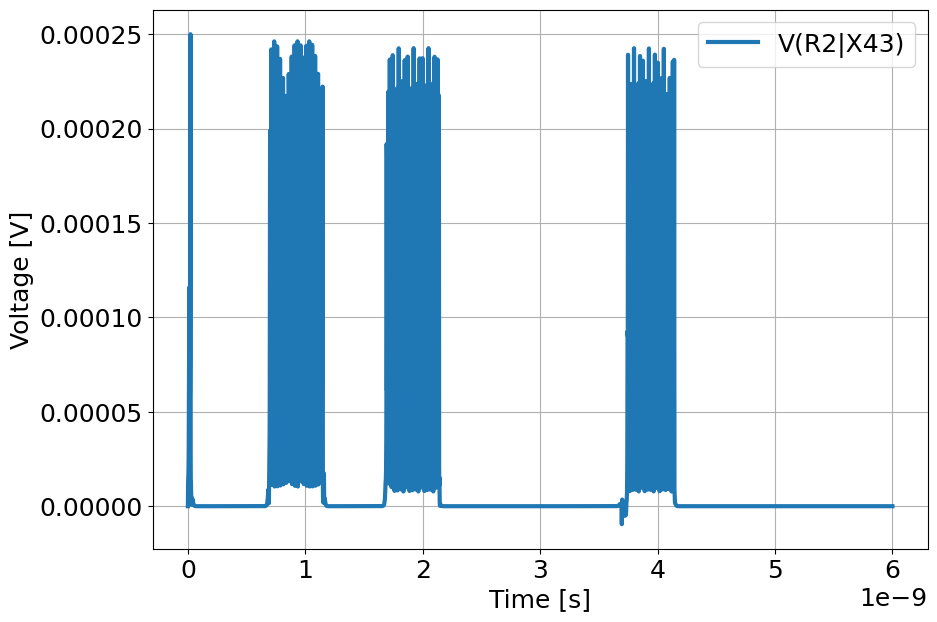

In [2]:
config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":500e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": [],
    "voltage.ele" : ["R2|X43"],
    "allow.multi.swithes" : False
}

netlist = """

*JSIM model
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)


.subckt jtl_squid   3       5 
L1                  3       1   1.85pH fcheck
L2                  3       4   1.85pH fcheck
B1                  1       5   jjmod area=#SQUIDJJ0(1.85,lower=0.5)
R1                  1       5   4.2ohm 
B2                  2       5   jjmod area=#SQUIDJJ0(1.85,lower=0.5)
R2                  2       5   4.2ohm
B3                  4       2   pjjmod area=10
R3                  4       2   0.2ohm
.ends


.subckt squid1        3  5 
L1                 3         1   1.85pH fcheck
L2                 3         4   1.85pH fcheck
B1                 1         5  jjmod area=#SQUIDJJ1(1.85,lower=0.5)
R1                 1         5   4.2ohm
B2                 2         5  jjmod area=#SQUIDJJ1(1.85,lower=0.5)
R2                 2         5   4.2ohm
B3                 4         2  pjjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid2        3  5 
L1                 3         1   1.85pH fcheck
L2                 3         4   1.85pH fcheck
B1                 1         5  jjmod area=#SQUIDJJ2(2.2,lower=0.5,dpv=10)
R1                 1         5   3.5ohm
B2                 2         5  jjmod area=#SQUIDJJ2(2.2,lower=0.5,dpv=10)
R2                 2         5   3.5ohm
B3                 4         2  pjjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid3        3  5 
L1                 3         1   1.85pH fcheck
L2                 3         4   1.85pH fcheck
B1                 1         5  jjmod area=#SQUIDJJ3(1.65,lower=0.5)
R1                 1         5   4.7ohm
B2                 2         5  jjmod area=#SQUIDJJ3(1.65,lower=0.5)
R2                 2         5   4.7ohm
B3                 4         2  pjjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid4        3  5 
L1                 3         1   1.85pH fcheck
L2                 3         4   1.85pH fcheck
B1                 1         5  jjmod area=#SQUIDJJ4(2.45,lower=0.5)
R1                 1         5   3.3ohm
B2                 2         5  jjmod area=#SQUIDJJ4(2.45,lower=0.5)
R2                 2         5   3.3ohm
B3                 4         2  pjjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid5        3  5 
L1                 3         1   1.85pH fcheck
L2                 3         4   1.85pH fcheck
B1                 1         5  jjmod area=#SQUIDJJ5(1.35,lower=0.5)
R1                 1         5   5.7ohm
B2                 2         5  jjmod area=#SQUIDJJ5(1.35,lower=0.5)
R2                 2         5   5.7ohm
B3                 4         2  pjjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid6        3  5 
L1                  3       1   1.85pH fcheck
L2                  3       4   1.85pH fcheck
B1                  1       5   jjmod area=#SQUIDJJ6(1.4,lower=0.5)
R1                  1       5   5.5ohm 
B2                  2       5   jjmod area=#SQUIDJJ6(1.4,lower=0.5)
R2                  2       5   5.5ohm
B3                  4       2   pjjmod area=10
R3                  4       2   0.2ohm
.ends


.subckt DCHFQ       1   9          10
Rin                     1       2       400ohm
L1                      2       3       1pH fcheck
L2                      3       0       #DCHFQL1(10,dpv=20)pH fcheck
L3                      3       4       1pH fcheck
X1      squid3          4       5
L4                      5       6       1pH fcheck
X2      squid6          6       0
Rb1                                                        6                   10                  13ohm
L5                      6       7       #JTLL(2,dpv=20)pH fcheck
X3          jtl_squid           7  0
Rb3                                   7     10        23ohm
X4          jtl_squid           8  0
Rb4                        8     10        23ohm
L6               7       8   #JTLL(2,dpv=20)pH fcheck
L7               8       9   #JTLL(2,dpv=20)pH fcheck
.ends

.subckt HFQ_JTL   72      92   10
X71          jtl_squid           72  0
Rb71                        72     10        23ohm
X72          jtl_squid           73  0
Rb72                        73     10        23ohm
X73          jtl_squid           74  0
Rb73                        74     10        23ohm
X74          jtl_squid           75  0
Rb74                        75     10        23ohm
X75          jtl_squid           76  0
Rb75                        76     10        23ohm
X76          jtl_squid           77  0
Rb76                        77     10        23ohm
X77          jtl_squid           78  0
Rb77                        78     10        23ohm
X78          jtl_squid           79  0
Rb78                        79     10        23ohm
X79          jtl_squid           80  0
Rb79                        80     10        23ohm
X80         jtl_squid           81  0
Rb80                        81     10        23ohm
X81         jtl_squid           82  0
Rb81                        82     10        23ohm
X82         jtl_squid           83  0
Rb82                        83     10        23ohm
X83         jtl_squid           84  0
Rb83                        84     10        23ohm
X84         jtl_squid           85  0
Rb84                        85     10        23ohm
X85         jtl_squid           86  0
Rb85                        86     10        23ohm
X86         jtl_squid           87  0
Rb86                        87     10        23ohm
X87         jtl_squid           88  0
Rb87                        88     10        23ohm
X88         jtl_squid           89  0
Rb88                        89     10        23ohm
X89         jtl_squid           90  0
Rb89                        90     10        23ohm
X90         jtl_squid           91  0
Rb90                        91     10        23ohm

L71               72       73   #JTLL(2,dpv=20)pH fcheck
L72               73       74   #JTLL(2,dpv=20)pH fcheck
L73               74       75   #JTLL(2,dpv=20)pH fcheck
L74               75       76   #JTLL(2,dpv=20)pH fcheck
L75               76       77   #JTLL(2,dpv=20)pH fcheck
L76               77       78   #JTLL(2,dpv=20)pH fcheck
L77               78       79   #JTLL(2,dpv=20)pH fcheck
L78               79       80   #JTLL(2,dpv=20)pH fcheck
L79               80       81   #JTLL(2,dpv=20)pH fcheck
L80              81       82   #JTLL(2,dpv=20)pH fcheck
L81              82       83   #JTLL(2,dpv=20)pH fcheck
L82              83       84   #JTLL(2,dpv=20)pH fcheck
L83              84       85   #JTLL(2,dpv=20)pH fcheck
L84              85       86   #JTLL(2,dpv=20)pH fcheck
L85              86       87   #JTLL(2,dpv=20)pH fcheck
L86              87       88   #JTLL(2,dpv=20)pH fcheck
L87              88       89   #JTLL(2,dpv=20)pH fcheck
L88              89       90   #JTLL(2,dpv=20)pH fcheck
L89              90       91   #JTLL(2,dpv=20)pH fcheck
L90              91       92    #JTLL(2,dpv=20)pH fcheck
.ends

.subckt    HFQDC   2   200

X1       jtl_squid         2  0
Rb1                        2     200        23ohm
X2       jtl_squid         3  0
Rb2                        3     200        23ohm
X3       jtl_squid         4  0
Rb3                       4    200        23ohm
X4       jtl_squid         5  0
Rb4                        5     200        23ohm
X5       jtl_squid         6  0
Rb5                       6     200        23ohm

L1               2        3   #JTLL(2,dpv=20)pH fcheck
L2               3        4   #JTLL(2,dpv=20)pH fcheck
L3               4        5   #JTLL(2,dpv=20)pH fcheck
L4               5        6   #JTLL(2,dpv=20)pH fcheck
L5               6        7   #JTLL(2,dpv=20)pH fcheck
L6               7        8   0.5pH fcheck
L7               7        9   0.5pH fcheck


Rb6                       12     200        #R1(33,dpv=20)ohm
Rb7                         7   200        #R2(20,dpv=20)ohm
Rb9                       18    200        #R3(15,dpv=20)ohm

X6       squid1     8       10
X7       squid3     9       11
L8                  10      12     #L8(1,dpv=20)pH fcheck
L30                 12      14      #L8(1,dpv=20)pH fcheck
L9                  11      13      #L9(1,dpv=20)pH fcheck
L40                 13      15      #L9(1,dpv=20)pH fcheck
L10                 12      16     #L10(5,dpv=20)pH fcheck
L11                 16      13     #L10(5,dpv=20)pH fcheck

X8       squid2     14      0
X9       squid4     15      0
L12                 16      17      1pH fcheck
X10      squid5     17      18
L13                 18      19      1pH fcheck
X11      squid6    19      0
L14                 16     100      1pH fcheck
R1                  100      0       1ohm
L15                19     20      2pH fcheck
R2                 20      0       50ohm
.ends
*
*** top cell: DCHFQDC

Vin2                      71       0       PWL(0ps 0mV 540ps 0mV 550ps 50mV 650ps 50mV 660ps 0mV   1040ps 0mV 1050ps 50mV 1150ps 50mV 1160ps 0mV   1540ps 0mV 1550ps 50mV 1650ps 50mV 1660ps 0mV   2040ps 0mV 2050ps 50mV 2150ps 50mV 2160ps 0mV  3540ps 0mV 3550ps 50mV 3650ps 50mV 3660ps 0mV   4040ps 0mV 4050ps 50mV 4150ps 50mV 4160ps 0mV)



*Vin                 70       0   Pulse(0mV,0.517mV,500ps,1ps,1ps,1ps,400ps)
*Rin                70      72   1ohm
*Vin               71        0   Pulse(0mV,50mV,500ps,10ps,10ps,100ps,400ps)
Vb1        100 0 pwl(0ps 0mV 20ps 2.5mV)

X41      DCHFQ           71       72       100
X42      HFQ_JTL          72       73             100
X43      HFQDC          73    100
*Lout                 73      75      10pH fcheck
*Rout  75    0   10ohm



*** jsim input file ***
.tran 1ps 6000ps 0ps 1ps


.print devv R2|X43
.end
"""

from optimize import data
import importlib
importlib.reload(data)

d = data.Data(netlist, config_data)
d.get_base_switch_timing()
# d.get_margins()